In [33]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
print('hello')

hello


In [3]:
patients_dataframe = pd.read_csv('dataset_dx_patients.csv')
patients_dataframe.head()

,member_id,age,sex,prior_smoking,prior_drinking,admit_date,ICD_10_Dx_code,admit_hospital,admit_physician_name
0,25076,63,Female,Yes,Yes,11/12/20,Z00.00,Eaton-Adams,Nicole Berry
1,95680,53,Male,Yes,No,10/23/21,N39.0,Porter-Baker,Charles Harris
2,45679,50,Female,No,No,12/2/20,Z00.00,Foster-Franklin,Mark Williams PhD
3,13849,90,Female,Yes,No,7/19/21,I10,Eaton-Adams,Mary Brown
4,88570,86,Male,No,No,10/7/21,Z00.00,Barker LLC,Dan Nelson


In [4]:
#attempting .describe to see what the automated analysis appears like.

patients_dataframe.describe()

#currently .describe() can only process member_id and age() as numerics but it is not necessarily a sensible description. 

,member_id,age
count,100529.000000,100529.000000
mean,50250.589472,53.985427
std,29012.211999,21.070227
min,1.000000,1.000000
25%,25125.000000,36.000000
50%,50251.000000,54.000000
75%,75375.000000,72.000000
max,100500.000000,144.000000


In [5]:
#the first thing I will do is drop duplicates
print(patients_dataframe.shape) #looking at initial shape to compare how many cells are dropped after procedure
patients_dataframe = patients_dataframe.drop_duplicates()
print(patients_dataframe.shape) #shape after procedure

(100529, 9)
(100508, 9)


In [6]:
patients_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100508 entries, 0 to 100528
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   member_id             100508 non-null  int64 
 1   age                   100508 non-null  int64 
 2   sex                   100508 non-null  object
 3   prior_smoking         97039 non-null   object
 4   prior_drinking        97191 non-null   object
 5   admit_date            100508 non-null  object
 6   ICD_10_Dx_code        99834 non-null   object
 7   admit_hospital        100008 non-null  object
 8   admit_physician_name  100508 non-null  object
dtypes: int64(2), object(7)
memory usage: 7.7+ MB


In [7]:
patients_dataframe.select_dtypes(include='int64')

,member_id,age
0,25076,63
1,95680,53
2,45679,50
3,13849,90
4,88570,86
...,...,...
100524,100496,71
100525,100497,25
100526,100498,40
100527,100499,20


# **Dropping rows with empty cells**


In [8]:
patients_dataframe['age'].mode()

0    18
Name: age, dtype: int64

In [9]:

#replace ages with mode first.. then drop the nulls of other values?  Age is the main numeric in this dataframe.



#replacing null values(except for ICD-10 column) with the null
age_mode = patients_dataframe['age'].mode()
print(age_mode)
print(patients_dataframe['age'].fillna(age_mode) )
patients_dataframe['age'] = patients_dataframe['age'].fillna(age_mode)

print("prior shape before dropping:", patients_dataframe.shape)
patients_dataframe =patients_dataframe.dropna()
print("prior shape after dropping:", patients_dataframe.shape)



0    18
Name: age, dtype: int64
0         63
1         53
2         50
3         90
4         86
          ..
100524    71
100525    25
100526    40
100527    20
100528    37
Name: age, Length: 100508, dtype: int64
prior shape before dropping: (100508, 9)
prior shape after dropping: (93000, 9)


# **Removing numerical outliers: Age**

In [44]:
#This line of code is to try and study what age values appear in the dataset independent of frequency to try and get an idea of the range.
print(patients_dataframe['age'].unique())


[ 63  53  50  90  86  35  70  37  44  62  24  49  74  25  40  34  21  45
  89  65  76  88  56  85  87  39  28  82  27  26  66  47  31  43  23  38
  58  77  67  59  73  30  42  52  46  41  22  57  69  84  81  68  61  60
  72  48  64  75  51  78  29  36  54  80  33  83  55  71  79  18  32  20
  19   5   2   4   7   3   6   1 112]


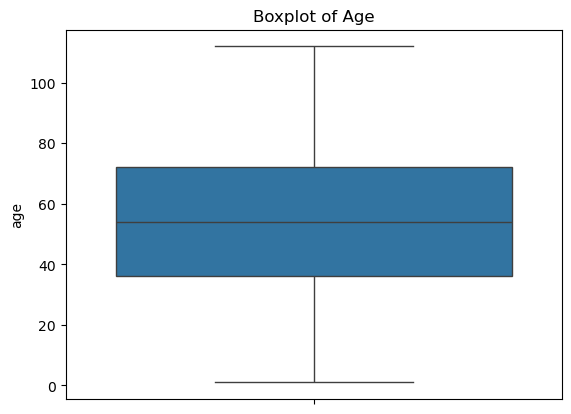

In [45]:
sns.boxplot(patients_dataframe['age'])
plt.title('Boxplot of Age')
plt.show()

In [47]:

z_scores = np.abs(stats.zscore(patients_dataframe['age']))

outliers = patients_dataframe[z_scores > 3] #include 99.7% of values in the data, a standard deviation of 3 should exclude the extreme outliers within the 0.03%
print("index of outliers:", outliers)

df_clean = patients_dataframe.drop(outliers.index)

print("Original DataFrame shape:", patients_dataframe.shape)
print("Clean DataFrame shape:", df_clean.shape)


print(patients_dataframe['age'].unique())
print( df_clean['age'].unique())

index of outliers: Empty DataFrame
Columns: [member_id, age, sex, prior_smoking, prior_drinking, admit_date, ICD_10_Dx_code, admit_hospital, admit_physician_name]
Index: []
Original DataFrame shape: (92996, 9)
Clean DataFrame shape: (92996, 9)
[ 63  53  50  90  86  35  70  37  44  62  24  49  74  25  40  34  21  45
  89  65  76  88  56  85  87  39  28  82  27  26  66  47  31  43  23  38
  58  77  67  59  73  30  42  52  46  41  22  57  69  84  81  68  61  60
  72  48  64  75  51  78  29  36  54  80  33  83  55  71  79  18  32  20
  19   5   2   4   7   3   6   1 112]
[ 63  53  50  90  86  35  70  37  44  62  24  49  74  25  40  34  21  45
  89  65  76  88  56  85  87  39  28  82  27  26  66  47  31  43  23  38
  58  77  67  59  73  30  42  52  46  41  22  57  69  84  81  68  61  60
  72  48  64  75  51  78  29  36  54  80  33  83  55  71  79  18  32  20
  19   5   2   4   7   3   6   1 112]


In [48]:
patients_dataframe =df_clean
patients_dataframe.head()

,member_id,age,sex,prior_smoking,prior_drinking,admit_date,ICD_10_Dx_code,admit_hospital,admit_physician_name
0,25076,63,Female,Yes,Yes,11/12/20,Z00.00,Eaton-Adams,Nicole Berry
1,95680,53,Male,Yes,No,10/23/21,N39.0,Porter-Baker,Charles Harris
2,45679,50,Female,No,No,12/2/20,Z00.00,Foster-Franklin,Mark Williams PhD
3,13849,90,Female,Yes,No,7/19/21,I10,Eaton-Adams,Mary Brown
4,88570,86,Male,No,No,10/7/21,Z00.00,Barker LLC,Dan Nelson


sex
Female    46562
Male      46434
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

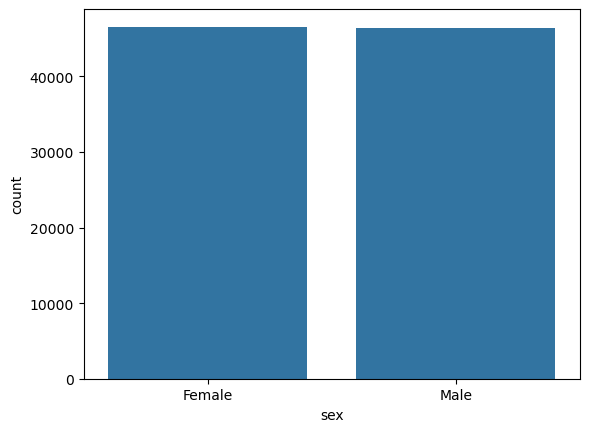

In [49]:
print(patients_dataframe['sex'].value_counts() )
sns.barplot(patients_dataframe['sex'].value_counts())


<Axes: >

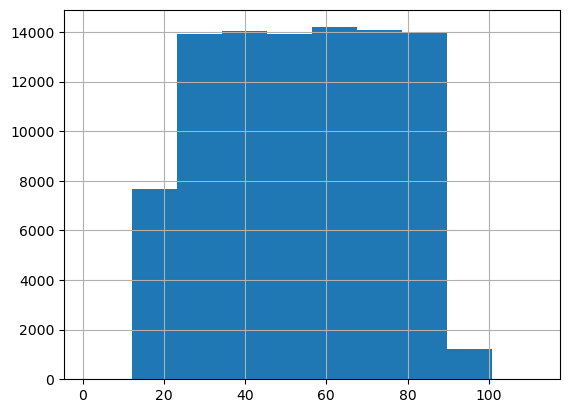

In [50]:
#note to self: using seaborn did not work well with the dataframes, try pandas plot methods first
ages_dataframe = patients_dataframe['age']

ages_dataframe.hist()

<bound method IndexOpsMixin.value_counts of prior_smoking  prior_drinking
No             Yes               23383
Yes            No                23362
               Yes               23137
No             No                23114
Name: count, dtype: int64>


<Axes: xlabel='prior_smoking,prior_drinking'>

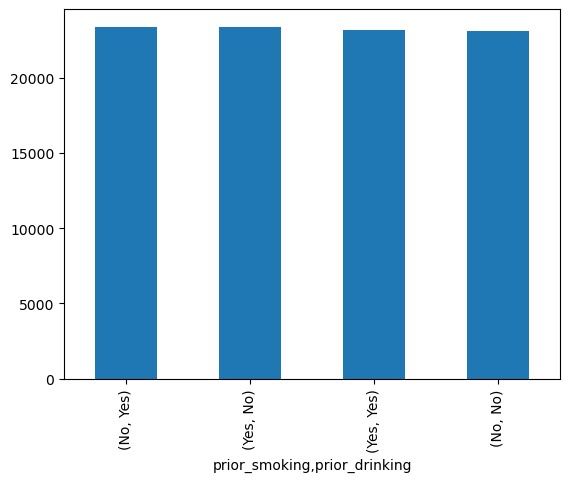

In [51]:
prior_dataframe = patients_dataframe.loc[:, ['prior_smoking', 'prior_drinking']].value_counts()
print(prior_dataframe.value_counts)

prior_dataframe.plot.bar()




# **Descriptive statistics of ICD value counts**


overall counts of ICD code ICD_10_Dx_code
Z00.00     13487
J45.909    13330
E11.9      13324
N39.0      13252
I10        13238
M54.5      13211
K21.9      13150
K21.10         1
I11            1
I12            1
E11.10         1
Name: count, dtype: int64
minimum code 1 name of min: E11.10
maximum code 13487 name of min: Z00.00


<Axes: xlabel='ICD_10_Dx_code'>

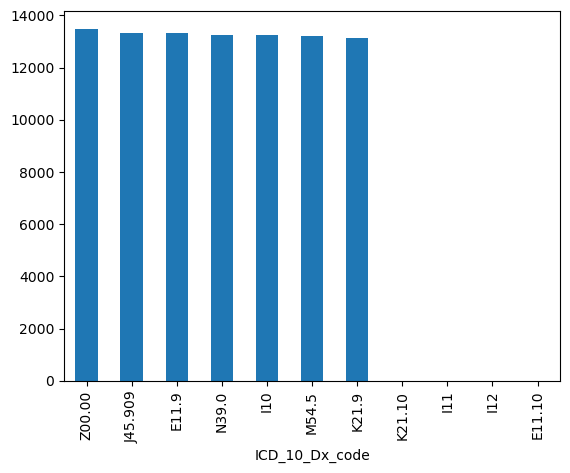

In [54]:
ICD_Dataframe_count = patients_dataframe['ICD_10_Dx_code'].value_counts()
print( "overall counts of ICD code", ICD_Dataframe_count)

min = ICD_Dataframe_count.min()
print("minimum code", min, "name of min:", patients_dataframe['ICD_10_Dx_code'].min() )



max= ICD_Dataframe_count.max()

print("maximum code", max, "name of min:", patients_dataframe['ICD_10_Dx_code'].max() )


ICD_Dataframe_count.plot(kind='bar')

# ** Descriptive Statistics of Age


In [55]:
patients_dataframe['age'].describe()

count    92996.000000
mean        54.001430
std         21.064675
min          1.000000
25%         36.000000
50%         54.000000
75%         72.000000
max        112.000000
Name: age, dtype: float64